In [ ]:
# Forcing autoreload of modules so restart is not required
%load_ext autoreload
%autoreload 2

import os

os.chdir("..")


print("Current Working Directory:  ", os.getcwd())

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

In [3]:
X_train = pd.read_csv('./data/processed/NB15/multi_class/X_train.csv',low_memory=False)
Y_train = pd.read_csv('./data/processed/NB15/multi_class/Y_train.csv',low_memory=False)


X_test = pd.read_csv('./data/processed/NB15/multi_class/X_test.csv',low_memory=False)
Y_test = pd.read_csv('./data/processed/NB15/multi_class/Y_test.csv',low_memory=False)

In [ ]:
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

In [5]:
dt_model = DecisionTreeClassifier(random_state=42)

In [6]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
Y_pred_dt = dt_model.predict(X_test)

In [8]:
accuracy = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(classification_report(Y_test, Y_pred_dt))

Decision Tree Accuracy: 0.4981
              precision    recall  f1-score   support

           0       0.48      0.68      0.56     37000
           1       0.14      0.07      0.09      4089
           2       0.56      0.37      0.45     41243

    accuracy                           0.50     82332
   macro avg       0.39      0.38      0.37     82332
weighted avg       0.50      0.50      0.48     82332



In [9]:
print(confusion_matrix(Y_test, Y_pred_dt))

[[25268   234 11498]
 [ 3173   288   628]
 [24309  1483 15451]]


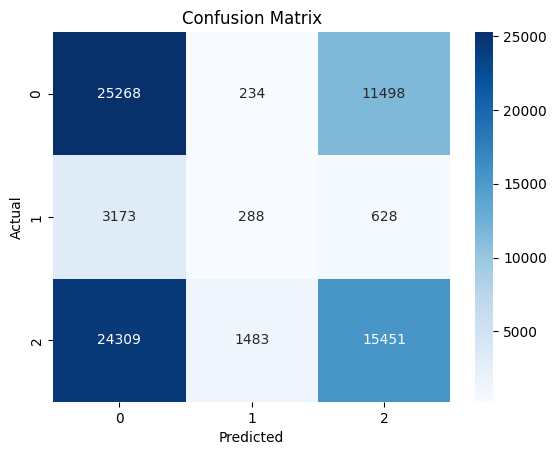

In [10]:
cm = confusion_matrix(Y_test, Y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
auc = roc_auc_score(Y_test, dt_model.predict_proba(X_test), multi_class='ovr')
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.5341


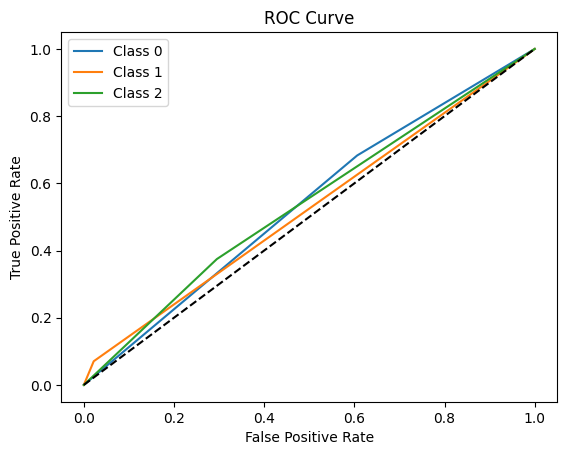

In [ ]:
Y_test_bin = label_binarize(Y_test, classes=dt_model.classes_)

plt.figure()
for i in range(Y_test_bin.shape[1]):
	fpr, tpr, _ = roc_curve(Y_test_bin[:, i], dt_model.predict_proba(X_test)[:, i])
	plt.plot(fpr, tpr, label=f'Class {dt_model.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
report = classification_report(Y_test, Y_pred_dt, output_dict=True)

df_report = pd.DataFrame(report).transpose()

print(f"\n{'='*40}")
print(f"{'Decision Tree Performance':^40}")
print(f"{'='*40}")
print(f"\nAccuracy: {accuracy:.4f}\n")

from tabulate import tabulate
print(tabulate(df_report, headers="keys", tablefmt="grid"))


       Decision Tree Performance        

Accuracy: 0.4981

+--------------+-------------+-----------+------------+--------------+
|              |   precision |    recall |   f1-score |      support |
+==============+=============+===========+============+==============+
| 0            |    0.479014 | 0.682919  |  0.563075  | 37000        |
+--------------+-------------+-----------+------------+--------------+
| 1            |    0.143641 | 0.0704329 |  0.0945192 |  4089        |
+--------------+-------------+-----------+------------+--------------+
| 2            |    0.560286 | 0.374633  |  0.449026  | 41243        |
+--------------+-------------+-----------+------------+--------------+
| accuracy     |    0.498069 | 0.498069  |  0.498069  |     0.498069 |
+--------------+-------------+-----------+------------+--------------+
| macro avg    |    0.394314 | 0.375995  |  0.368874  | 82332        |
+--------------+-------------+-----------+------------+--------------+
| weighted avg |